In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/maulanaakbardj/Home-Agriculture-Monitoring-System

Cloning into 'Home-Agriculture-Monitoring-System'...
remote: Enumerating objects: 55487, done.
remote: Total 55487 (delta 0), reused 0 (delta 0), pack-reused 55487
Receiving objects: 100% (55487/55487), 871.17 MiB | 34.49 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Checking out files: 100% (42103/42103), done.


In [3]:
import os

In [4]:
mypath= '/content/Home-Agriculture-Monitoring-System/ML/Data/Padi/'

In [5]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Bercak Daun Coklat    40
Hawar Daun Bakteri    40
Smut Daun             40
dtype: int64

In [8]:
df.head()

,path,file_name,tag
0,/content/Home-Agriculture-Monitoring-System/ML...,DSC_0305.JPG,Bercak Daun Coklat
1,/content/Home-Agriculture-Monitoring-System/ML...,DSC_0325.JPG,Bercak Daun Coklat
2,/content/Home-Agriculture-Monitoring-System/ML...,DSC_0295.JPG,Bercak Daun Coklat
3,/content/Home-Agriculture-Monitoring-System/ML...,DSC_0100.jpg,Bercak Daun Coklat
4,/content/Home-Agriculture-Monitoring-System/ML...,DSC_0391.jpg,Bercak Daun Coklat


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df['path']
y= df['tag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [12]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [13]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [14]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 96
val size 12
test size 12


In [15]:
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)



set         tag               
test        Bercak Daun Coklat     5
            Hawar Daun Bakteri     2
            Smut Daun              5
train       Bercak Daun Coklat    32
            Hawar Daun Bakteri    35
            Smut Daun             29
validation  Bercak Daun Coklat     3
            Hawar Daun Bakteri     3
            Smut Daun              6
dtype: int64 




,path,tag,set
25,/content/Home-Agriculture-Monitoring-System/ML...,Bercak Daun Coklat,train
14,/content/Home-Agriculture-Monitoring-System/ML...,Smut Daun,train
36,/content/Home-Agriculture-Monitoring-System/ML...,Hawar Daun Bakteri,train


In [16]:
import shutil
from tqdm.notebook import tqdm as tq

In [17]:
datasource_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Padi/"
dataset_path = "/content/Home-Agriculture-Monitoring-System/ML/Data/Padi/dataset/"

In [18]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [19]:
import tensorflow as tf

In [20]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
EPOCH = 10

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [24]:
train_generator = train_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Padi/dataset/train',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Padi/dataset/validation',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/Home-Agriculture-Monitoring-System/ML/Data/Padi/dataset/test',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 96 images belonging to 3 classes.
Found 12 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [25]:
print(labels)

dict_keys(['Bercak Daun Coklat', 'Hawar Daun Bakteri', 'Smut Daun'])


In [26]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator


In [27]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [28]:
from tensorflow.keras.applications import Xception
# get base models
base_model = Xception(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)


83689472/83683744 [==============================] - 1s 0us/step


In [29]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [30]:
# summarize the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [98]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


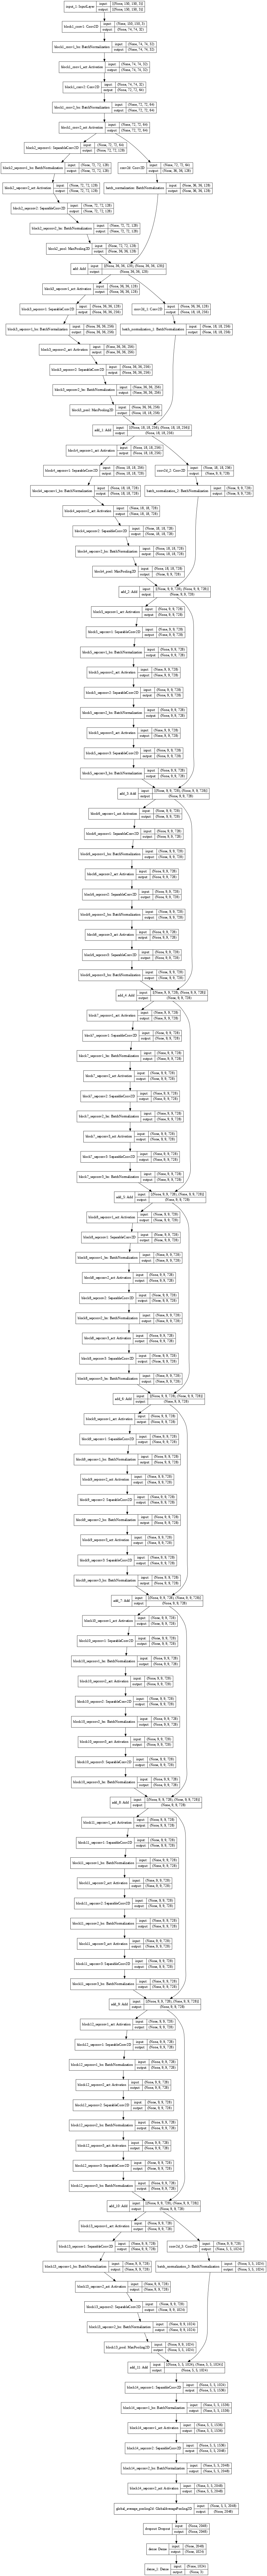

In [99]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model1.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [100]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=20,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose = 1)

Epoch 1/20
6/6 [==============================] - 8s 829ms/step - loss: 0.7630 - accuracy: 0.8750 - val_loss: 11.5528 - val_accuracy: 0.6667
Epoch 2/20
6/6 [==============================] - 4s 666ms/step - loss: 0.8543 - accuracy: 0.8854 - val_loss: 4.7661 - val_accuracy: 0.7500
Epoch 3/20
6/6 [==============================] - 4s 678ms/step - loss: 0.3070 - accuracy: 0.9167 - val_loss: 6.6705 - val_accuracy: 0.5833
Epoch 4/20
6/6 [==============================] - 4s 677ms/step - loss: 0.2126 - accuracy: 0.9792 - val_loss: 6.3231 - val_accuracy: 0.6667
Epoch 5/20
6/6 [==============================] - 4s 673ms/step - loss: 0.1208 - accuracy: 0.9792 - val_loss: 9.7952 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 4s 671ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 12.3830 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 4s 667ms/step - loss: 0.4038 - accuracy: 0.9583 - val_loss: 14.5158 - val_accuracy: 0.5000
Epoch 8/20
6/6 [=

In [101]:
history.history['loss']

[0.7630476951599121,
 0.8543193340301514,
 0.30703356862068176,
 0.2125939279794693,
 0.12078569084405899,
 0.01756676286458969,
 0.40382659435272217,
 0.07504252344369888,
 0.15437112748622894,
 0.28979024291038513,
 0.2726185619831085,
 0.21801944077014923,
 0.4404389560222626,
 0.13884498178958893,
 0.1214994415640831,
 0.020926596596837044,
 0.06106887385249138,
 0.14759314060211182,
 0.10253772884607315,
 0.06056709960103035]

In [102]:
history.history['accuracy']

[0.875,
 0.8854166865348816,
 0.9166666865348816,
 0.9791666865348816,
 0.9791666865348816,
 1.0,
 0.9583333134651184,
 0.96875,
 0.96875,
 0.9583333134651184,
 0.9479166865348816,
 0.9270833134651184,
 0.9375,
 0.96875,
 0.9583333134651184,
 0.9895833134651184,
 0.96875,
 0.9479166865348816,
 0.9791666865348816,
 1.0]

In [103]:
from matplotlib import pyplot as plt

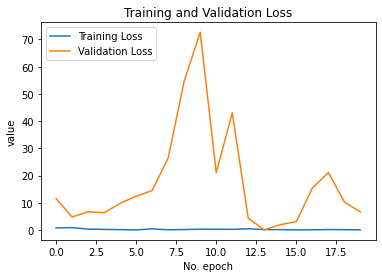

In [104]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

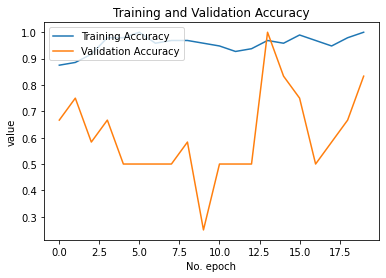

In [105]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [106]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.8333 
Loss on training data: 16.4998 

Accuracy on test data: 0.6667 
Loss on test data: 19.8331 



In [107]:
MODEL_BASE_PATH = "/content/drive/MyDrive/"
PROJECT_NAME = "model_project"
SAVE_MODEL_NAME = "Model_Padi_Xception.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/model_project/Model_Padi_Xception.h5...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [108]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [109]:
# Parameters
input_size = (150,150)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['Bercak Daun Coklat', 'Hawar Daun Bakteri', 'Smut Daun']

In [110]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [111]:
from tensorflow.keras.models import load_model

In [112]:
MODEL_PATH = '/content/drive/MyDrive/model_project/Model_Padi_Xception.h5'
model = load_model(MODEL_PATH,compile=False)

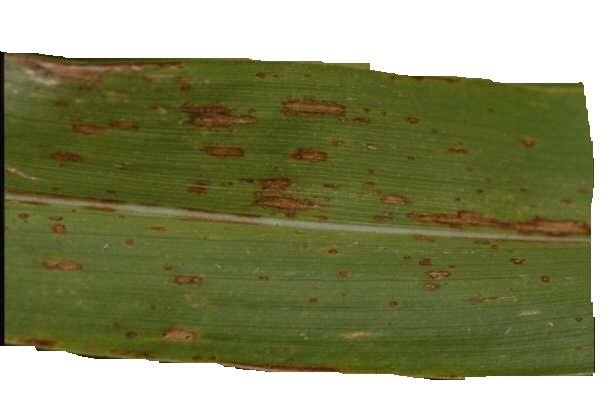

In [113]:
# read image
im = Image.open('/content/Home-Agriculture-Monitoring-System/ML/Data/Padi/Smut Daun/DSC_0503.jpg')
display(im)

In [114]:
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y)*100 , "%")

Smut Daun 99.94499087333679 %


In [115]:
y

array([[5.5003306e-04, 5.3945918e-08, 9.9944991e-01]], dtype=float32)